The dataset used in this project is related to the diagnosis of diabetes and was obtained from https://www.kaggle.com/datasets/sujithmandala/easiest-diabetes-classification-dataset 

In [1]:
filename = "Diabetes-Classification.csv"
target_variable_name = "Diagnosis_index"

In [2]:
from pyspark.sql.functions import *

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
data = spark.read.csv(filename, header=True, inferSchema=True, sep=',')
data.show()

+---+------+---+--------------+---+-----+--------------------------+-------+-------+--------+---------+
|Age|Gender|BMI|Blood Pressure|FBS|HbA1c|Family History of Diabetes|Smoking|   Diet|Exercise|Diagnosis|
+---+------+---+--------------+---+-----+--------------------------+-------+-------+--------+---------+
| 45|  Male| 25|        Normal|100|  5.7|                        No|     No|Healthy| Regular|       No|
| 55|Female| 30|          High|120|  6.4|                       Yes|    Yes|   Poor|      No|      Yes|
| 65|  Male| 35|          High|140|  7.1|                       Yes|    Yes|   Poor|      No|      Yes|
| 75|Female| 40|          High|160|  7.8|                       Yes|    Yes|   Poor|      No|      Yes|
| 40|  Male| 20|        Normal| 80|  5.0|                        No|     No|Healthy| Regular|       No|
| 50|Female| 25|        Normal|100|  5.7|                        No|     No|Healthy| Regular|       No|
| 60|  Male| 30|        Normal|120|  6.4|                       

# EDA

## Basic Statistics

In [4]:
data.count()

128

In [5]:
len(data.columns)

11

The dataset consist of 11 columns and 128 rows.

In [6]:
data.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Blood Pressure: string (nullable = true)
 |-- FBS: integer (nullable = true)
 |-- HbA1c: double (nullable = true)
 |-- Family History of Diabetes: string (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- Diet: string (nullable = true)
 |-- Exercise: string (nullable = true)
 |-- Diagnosis: string (nullable = true)



In this dataset, there are 11 variables. They are Age, Gender, BMI, Blood Pressure, FBS, HbA1c, Family History of Diabetes, Smoking, Diet, Exercise, and Diagnosis.

The data type of the Age, BMI, and FBS variables are integer.

The data type of the HbA1c variable is double. 

The variables Gender, Blood Pressure, Family History of Diabetes, Smoking, Diet, Exercise, and Diagnosis are of string data type.

All columns allow null values, indicating the possibility of missing values. Therefore, a check for missing values in all variables is needed.

In [7]:
data.describe().toPandas()

,summary,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,count,128,128,128,128,128,128,128,128,128,128,128
1,mean,42.03125,None,35.359375,None,162.5,7.8875,None,None,None,None,None
2,stddev,16.783915012582924,None,14.981739212872439,None,61.32397509343179,2.146339128270113,None,None,None,None,None
3,min,12,Female,10,High,80,5.0,No,No,Healthy,No,No
4,max,75,Male,67,Normal,280,12.0,Yes,Yes,Poor,Regular,Yes


Some information can be obtained from the numeric features in the table above :

1. For the "Age" variable, there are 128 data points with a mean age of 42.03 years and a standard deviation of 16.78. The age ranges from a minimum of 12 years to a maximum of 75 years.

2. The "BMI" column comprises 128 entries, with an average BMI of 35.36 and a standard deviation of 14.98. The BMI values range from a minimum of 10 to a maximum of 67.

3. For "FBS" (Fasting Blood Sugar), there are 128 entries with an average value of 162.5 and a standard deviation of 61.32. The FBS values vary from a minimum of 80 to a maximum of 280.

4. The "HbA1c" variable has 128 observations, featuring an average HbA1c level of 7.89, with a standard deviation of 2.15. The HbA1c levels range from a minimum of 5.0 to a maximum of 12.0.

In [8]:
gender_counts = data.groupBy('Gender').agg(count('*').alias('count'))
gender_counts.show()

+------+-----+
|Gender|count|
+------+-----+
|Female|   60|
|  Male|   68|
+------+-----+



The "gender" variable has 2 unique values, namely Female and Male. In this dataset, there are 60 occurrences of Female and 68 occurrences of Male.

In [9]:
blood_pressure_counts = data.groupBy('Blood Pressure').agg(count('*').alias('count'))
blood_pressure_counts.show()

+--------------+-----+
|Blood Pressure|count|
+--------------+-----+
|          High|   79|
|           Low|   10|
|        Normal|   39|
+--------------+-----+



The "Blood Pressure" variable has three categories: High, Low, and Normal. In the dataset, there are 79 instances with High blood pressure, 10 instances with Low blood pressure, and 39 instances with Normal blood pressure.

In [10]:
fam_hist_of_diabetes_counts = data.groupBy('Family History of Diabetes').agg(count('*').alias('count'))
fam_hist_of_diabetes_counts.show()

+--------------------------+-----+
|Family History of Diabetes|count|
+--------------------------+-----+
|                        No|   77|
|                       Yes|   51|
+--------------------------+-----+



The variable "Family History of Diabetes" has binary values. In 77 cases, there is no family history of diabetes, whereas in 51 cases, there is an indication of a family history of diabetes.

In [11]:
smoking_counts = data.groupBy('Smoking').agg(count('*').alias('count'))
smoking_counts.show()

+-------+-----+
|Smoking|count|
+-------+-----+
|     No|   49|
|    Yes|   79|
+-------+-----+



The variable "Family History of Diabetes" also has binary values. There are 49 instances of individuals who do not smoke ("No") and 79 instances of individuals who smoke ("Yes").

In [12]:
diet_counts = data.groupBy('Diet').agg(count('*').alias('count'))
diet_counts.show()

+-------+-----+
|   Diet|count|
+-------+-----+
|Healthy|   49|
|   Poor|   79|
+-------+-----+



The variable "Diet" has 2 unique values, namely Healthy and Poor. Within the dataset, there are 49 instances of individuals following a healthy diet and 79 instances of individuals following a poor diet.

In [13]:
exercise_counts = data.groupBy('Exercise').agg(count('*').alias('count'))
exercise_counts.show()

+--------+-----+
|Exercise|count|
+--------+-----+
|      No|   79|
| Regular|   49|
+--------+-----+



The variable "Exercise" has 2 unique values, namely No and Regular. Within the dataset, there are 79 instances of individuals who do not exercise and 49 instances of individuals who exercise regularly.

In [14]:
diagnosis_counts = data.groupBy('Diagnosis').agg(count('*').alias('count'))
diagnosis_counts.show()

+---------+-----+
|Diagnosis|count|
+---------+-----+
|       No|   97|
|      Yes|   31|
+---------+-----+



The variable "Diagnosis" has binary values. There are 97 instances where individuals are diagnosed with no diabetes, and 31 instances where individuals are diagnosed with diabetes.

## Check for Missing Value

In [15]:
data.toPandas().isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

There are no missing values in any of the variables.

## Check for Cardinality

In [16]:
data.toPandas().nunique()

Age                           35
Gender                         2
BMI                           34
Blood Pressure                 3
FBS                           11
HbA1c                         11
Family History of Diabetes     2
Smoking                        2
Diet                           2
Exercise                       2
Diagnosis                      2
dtype: int64

There are 6 variables with 2 unique values, including Gender, Family History of Diabetes, Smoking, Diet, Exercise, and Diagnosis.

The variable with the highest cardinality is Age, with 35 unique values.

## Data Cleaning and Preparation

### Impute Missing Value

In fact, no missing values are present in this dataset. Some chunks have been added below solely to complete the documentation of Data Cleaning and Preparation.

In [17]:
for column in data.columns:
    mean_value = data.select(mean(col(column)).alias('mean')).collect()[0]["mean"]
    mode_value = data.select(mode(col(column)).alias('mode')).collect()[0]['mode']
    if mean_value is not None:
        data = data.na.fill(mean_value, [column])
    else :
        data = data.na.fill(mode_value, [column])

In [18]:
data.toPandas().isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

## Feature Transformation

In [19]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import StringType

def index_string_columns(df):
    string_columns = [t[0] for t in df.dtypes if t[1] == 'string']
    for column in string_columns:
        indexer = StringIndexer(inputCol=column, outputCol=column+"_index")
        df = indexer.fit(df).transform(df)
    return df

In [20]:
data = index_string_columns(data)

In [21]:
data.dtypes

[('Age', 'int'),
 ('Gender', 'string'),
 ('BMI', 'int'),
 ('Blood Pressure', 'string'),
 ('FBS', 'int'),
 ('HbA1c', 'double'),
 ('Family History of Diabetes', 'string'),
 ('Smoking', 'string'),
 ('Diet', 'string'),
 ('Exercise', 'string'),
 ('Diagnosis', 'string'),
 ('Gender_index', 'double'),
 ('Blood Pressure_index', 'double'),
 ('Family History of Diabetes_index', 'double'),
 ('Smoking_index', 'double'),
 ('Diet_index', 'double'),
 ('Exercise_index', 'double'),
 ('Diagnosis_index', 'double')]

There are 7 variables with string data types: Gender, Blood Pressure, Family History of Diabetes, Smoking, Diet, Exercise, and Diagnosis. They will be transformed into numeric values.

### Drop all String/Object Variables

In [22]:
def variable_type(df):
    
    vars_list = df.dtypes
    char_vars = []
    num_vars = []
    for i in vars_list:
        if i[1] in ('string'):
            char_vars.append(i[0])
        else:
            num_vars.append(i[0])
    
    return char_vars, num_vars

In [23]:
char_vars, num_vars = variable_type(data)

data = data.select([c for c in data.columns if c not in char_vars])

In [24]:
data.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- FBS: integer (nullable = true)
 |-- HbA1c: double (nullable = false)
 |-- Gender_index: double (nullable = false)
 |-- Blood Pressure_index: double (nullable = false)
 |-- Family History of Diabetes_index: double (nullable = false)
 |-- Smoking_index: double (nullable = false)
 |-- Diet_index: double (nullable = false)
 |-- Exercise_index: double (nullable = false)
 |-- Diagnosis_index: double (nullable = false)



In [25]:
data.show()

+---+---+---+-----+------------+--------------------+--------------------------------+-------------+----------+--------------+---------------+
|Age|BMI|FBS|HbA1c|Gender_index|Blood Pressure_index|Family History of Diabetes_index|Smoking_index|Diet_index|Exercise_index|Diagnosis_index|
+---+---+---+-----+------------+--------------------+--------------------------------+-------------+----------+--------------+---------------+
| 45| 25|100|  5.7|         0.0|                 1.0|                             0.0|          1.0|       1.0|           1.0|            0.0|
| 55| 30|120|  6.4|         1.0|                 0.0|                             1.0|          0.0|       0.0|           0.0|            1.0|
| 65| 35|140|  7.1|         0.0|                 0.0|                             1.0|          0.0|       0.0|           0.0|            1.0|
| 75| 40|160|  7.8|         1.0|                 0.0|                             1.0|          0.0|       0.0|           0.0|            1.0|

All string variables were encoded into numeric values using label encoding. As a result, the data now consists of 11 numeric variables.

## Visualization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
vis_df = data.toPandas()

In [28]:
gender_counts = vis_df['Gender_index'].value_counts()
gender_counts

Gender_index
0.0    68
1.0    60
Name: count, dtype: int64

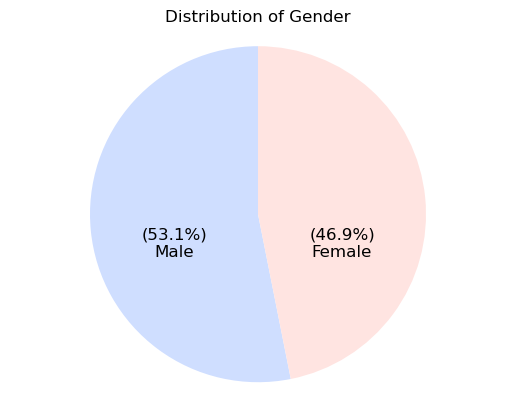

In [29]:
colors = ['#cfdeff', 'mistyrose']

plt.pie(gender_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({gender_counts[0]/gender_counts.sum()*100:.1f}%)\nMale', color='black', fontsize=12, ha='center')
plt.text(0.5, -0.25, f'({gender_counts[1]/gender_counts.sum()*100:.1f}%)\nFemale', color='black', fontsize=12, ha='center')

plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

53% gender in this dataset are male and the rest are female.

In [30]:
bp_counts = vis_df['Blood Pressure_index'].value_counts()
bp_counts

Blood Pressure_index
0.0    79
1.0    39
2.0    10
Name: count, dtype: int64

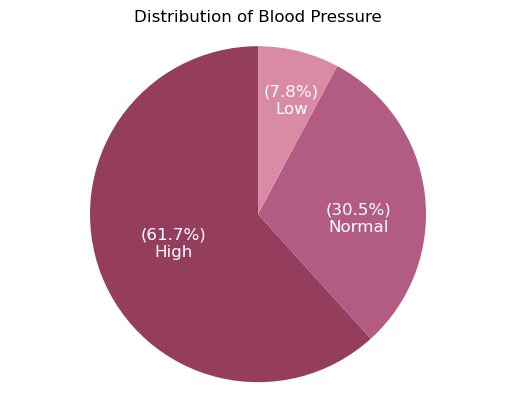

In [31]:
colors = ['#943d5c', '#b25c83', '#d98ba5']

plt.pie(bp_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({bp_counts[0]/bp_counts.sum()*100:.1f}%)\nHigh', color='white', fontsize=12, ha='center')
plt.text(0.6, -0.1, f'({bp_counts[1]/bp_counts.sum()*100:.1f}%)\nNormal', color='white', fontsize=12, ha='center')
plt.text(0.2, 0.6, f'({bp_counts[2]/bp_counts.sum()*100:.1f}%)\nLow', color='white', fontsize=12, ha='center')


plt.title('Distribution of Blood Pressure')
plt.axis('equal')
plt.show()

61.7% of the patients in this dataset have high blood pressure, while 30.5% have normal blood pressure, and the remaining portion has low blood pressure.

In [32]:
fam_counts = vis_df['Family History of Diabetes_index'].value_counts()
fam_counts

Family History of Diabetes_index
0.0    77
1.0    51
Name: count, dtype: int64

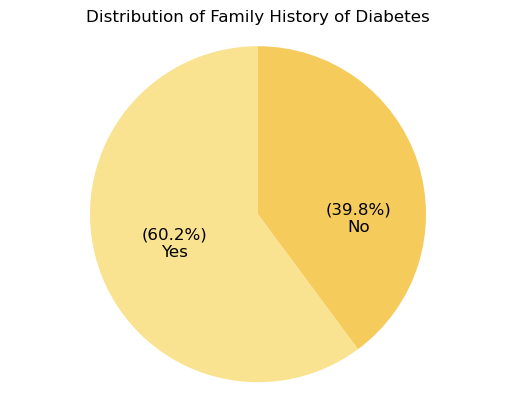

In [33]:
colors = ['#f9e390', '#f5cb5b']

plt.pie(fam_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({fam_counts[0]/fam_counts.sum()*100:.1f}%)\nYes', color='black', fontsize=12, ha='center')
plt.text(0.6, -0.1, f'({fam_counts[1]/fam_counts.sum()*100:.1f}%)\nNo', color='black', fontsize=12, ha='center')

plt.title('Distribution of Family History of Diabetes')
plt.axis('equal')
plt.show()

60.2% of the patients in this dataset have family history of diabetes.

In [34]:
smoking1_counts = vis_df['Smoking_index'].value_counts()
smoking1_counts

Smoking_index
0.0    79
1.0    49
Name: count, dtype: int64

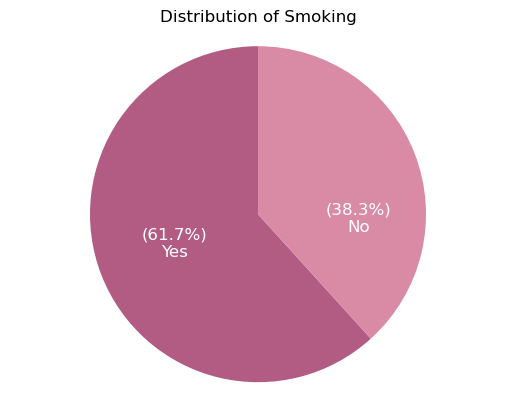

In [35]:
colors = ['#b25c83', '#d98ba5']

plt.pie(smoking1_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({smoking1_counts[0]/smoking1_counts.sum()*100:.1f}%)\nYes', color='white', fontsize=12, ha='center')
plt.text(0.6, -0.1, f'({smoking1_counts[1]/smoking1_counts.sum()*100:.1f}%)\nNo', color='white', fontsize=12, ha='center')

plt.title('Distribution of Smoking')
plt.axis('equal')
plt.show()

61.7% of the patients in this dataset are smoker.

In [36]:
diet1_counts = vis_df['Diet_index'].value_counts()
diet1_counts

Diet_index
0.0    79
1.0    49
Name: count, dtype: int64

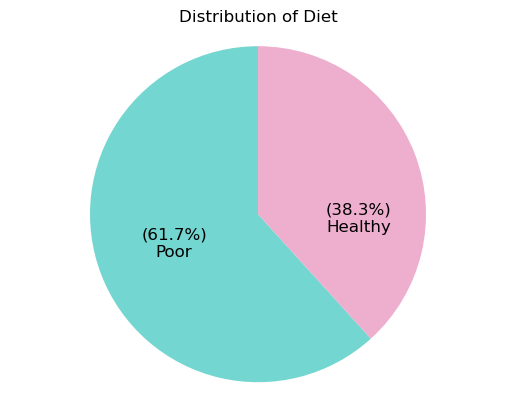

In [37]:
colors = ['#74d6d0', '#eeaece']

plt.pie(diet1_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({diet1_counts[0]/diet1_counts.sum()*100:.1f}%)\nPoor', color='black', fontsize=12, ha='center')
plt.text(0.6, -0.1, f'({diet1_counts[1]/diet1_counts.sum()*100:.1f}%)\nHealthy', color='black', fontsize=12, ha='center')

plt.title('Distribution of Diet')
plt.axis('equal')
plt.show()

61.7% of the patients in this dataset have poor dietary habits.

In [38]:
ex_counts = vis_df['Exercise_index'].value_counts()
ex_counts

Exercise_index
0.0    79
1.0    49
Name: count, dtype: int64

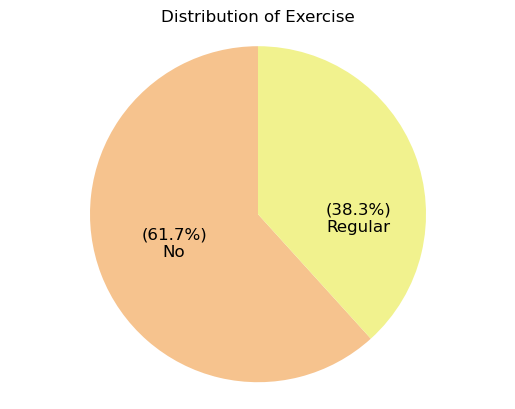

In [39]:
colors = ['#f6c38e', '#f1f28e']

plt.pie(ex_counts, colors=colors, startangle=90)

plt.text(-0.5, -0.25, f'({ex_counts[0]/ex_counts.sum()*100:.1f}%)\nNo', color='black', fontsize=12, ha='center')
plt.text(0.6, -0.1, f'({ex_counts[1]/ex_counts.sum()*100:.1f}%)\nRegular', color='black', fontsize=12, ha='center')

plt.title('Distribution of Exercise')
plt.axis('equal')
plt.show()

61.7% of the patients in this dataset do not participate in regular exercise.

In [40]:
diag_counts = vis_df['Diagnosis_index'].value_counts()
diag_counts

Diagnosis_index
0.0    97
1.0    31
Name: count, dtype: int64

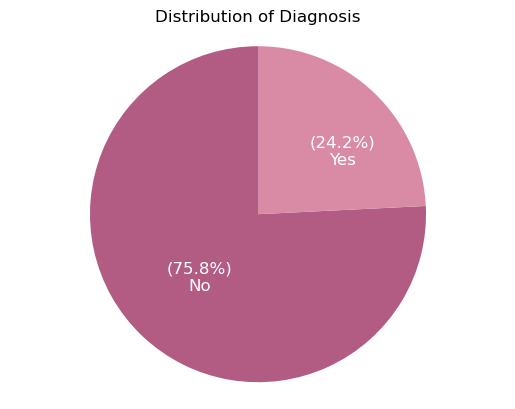

In [41]:
colors = ['#b25c83', '#d98ba5']

plt.pie(diag_counts, colors=colors, startangle=90)

plt.text(-0.35, -0.45, f'({diag_counts[0]/diag_counts.sum()*100:.1f}%)\nNo', color='white', fontsize=12, ha='center')
plt.text(0.5, 0.3, f'({diag_counts[1]/diag_counts.sum()*100:.1f}%)\nYes', color='white', fontsize=12, ha='center')

plt.title('Distribution of Diagnosis')
plt.axis('equal')
plt.show()

24.2% of the patients in this dataset are diagnosed with diabetes.

### Check for Normality

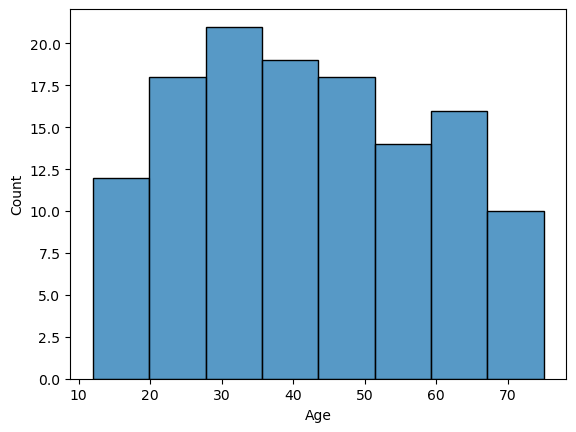

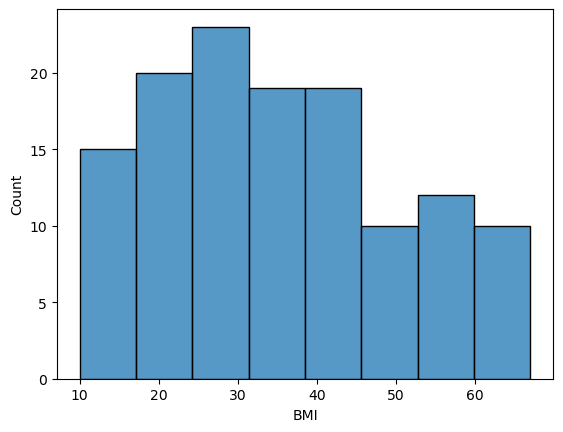

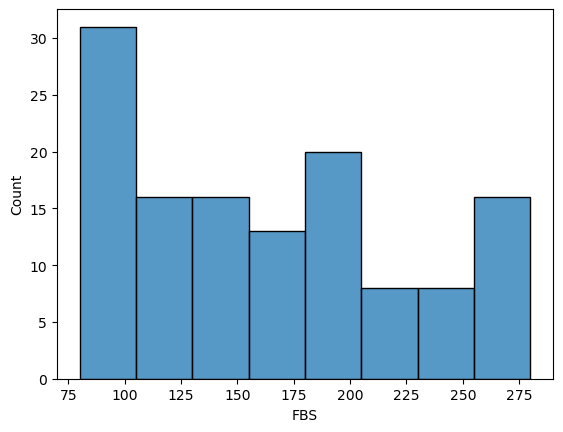

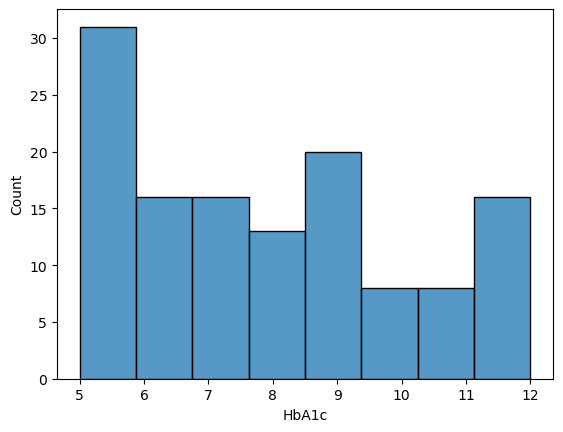

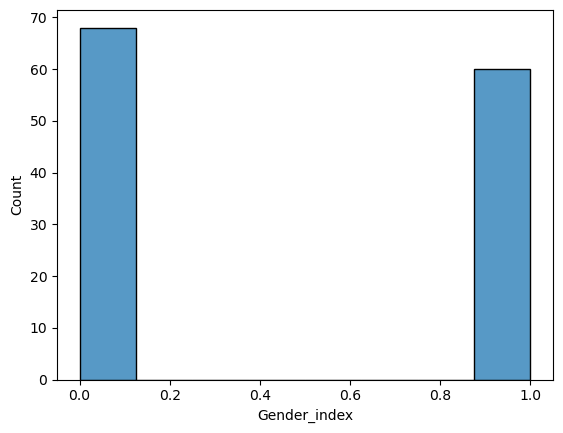

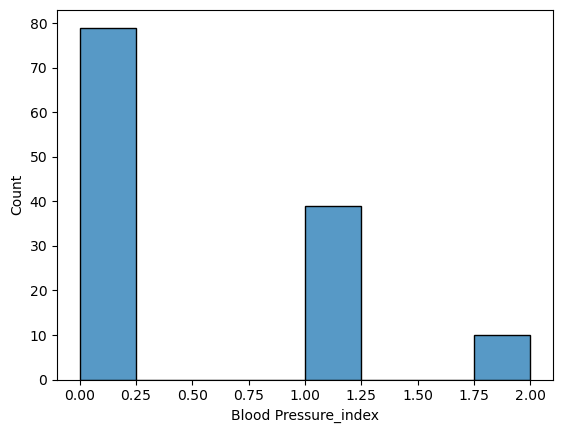

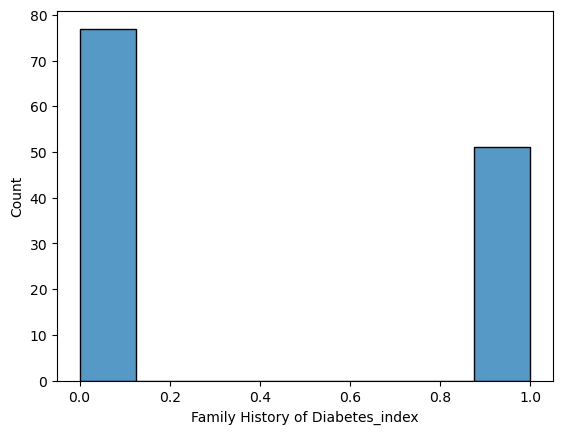

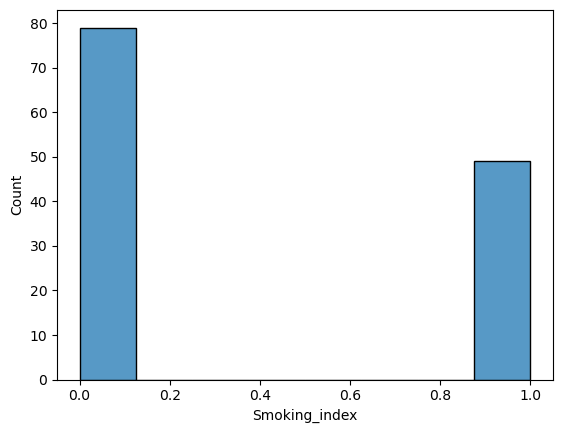

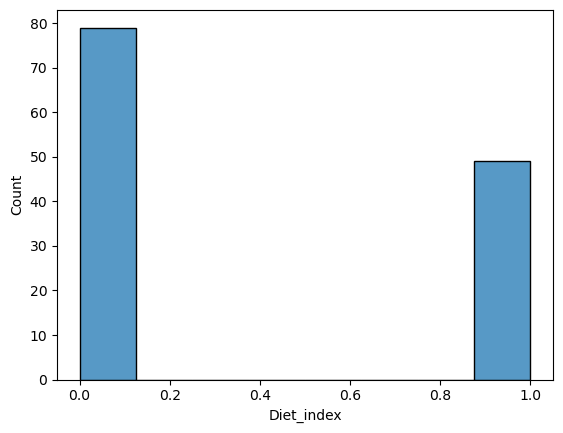

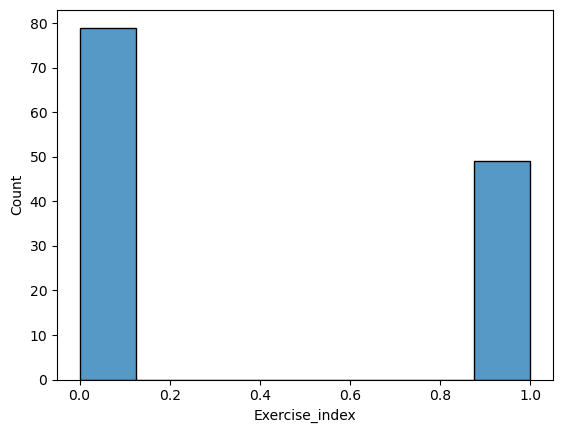

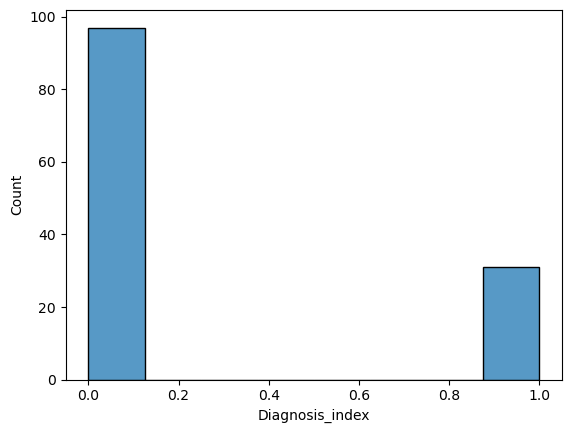

In [42]:
vis_df = data.toPandas()
for i, col in enumerate(vis_df.columns):
    plt.figure(i)
    sns.histplot(vis_df[col])

### Check for Correlation

<Axes: >

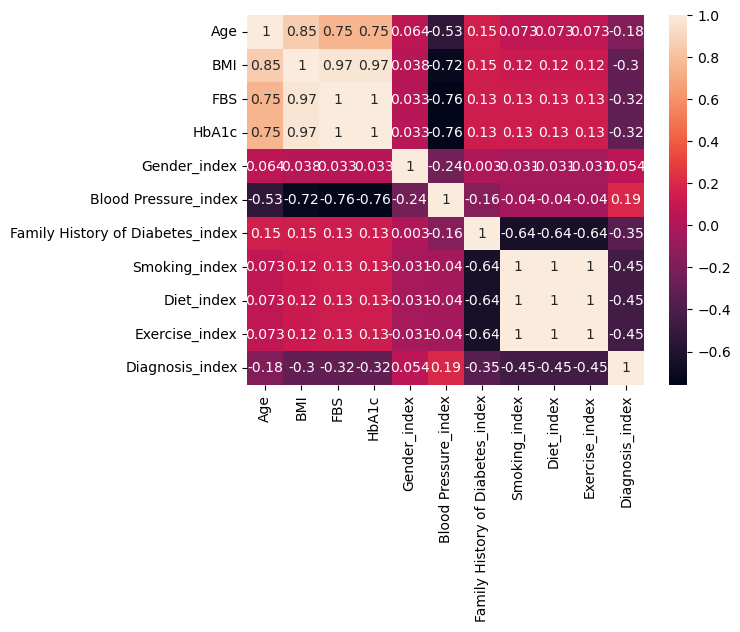

In [43]:
sns.heatmap(data.toPandas().corr(), annot=True)

From this heatmap, it can be seen that Age has a strong correlation with SMI, FBS, and HbAlc.

BMI has a very strong correlation with FBS and HbAlc. 

FBS has a perfect correcation (1) with HbAlc.

Smoking_index, Diet_Index, and ExerciseIndex have perfect positive correlation with each other.

# Model Data Preparation

### Drop dependent features with high correlation

Dependent features with perfect correlation (1) with other features are being dropped. In this case, the variables FBS, Smoking_index, and Diet_index will be dropped.

In [44]:
data = data.drop('FBS', 'Smoking_index', 'Diet_index')

<Axes: >

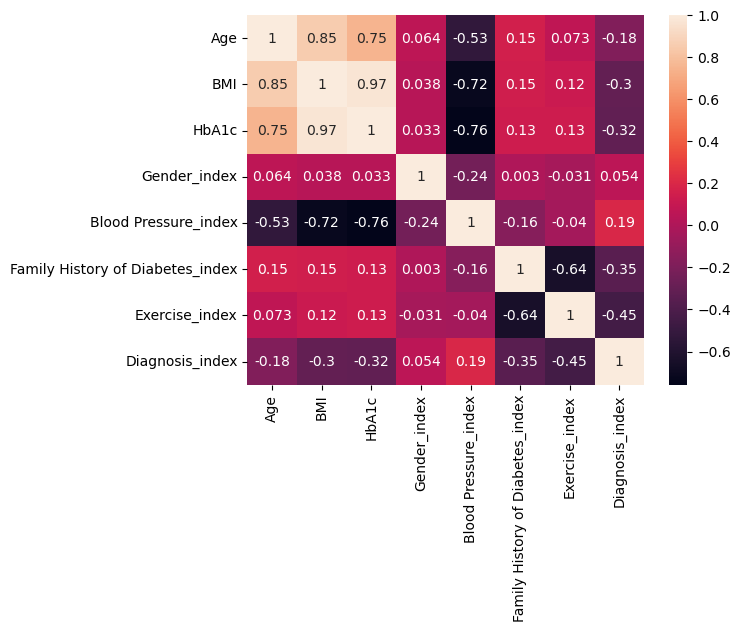

In [45]:
sns.heatmap(data.toPandas().corr(), annot=True)

No more perfect correlation (1) between 2 features.

### Split Data

The dataset was split into 70% train and 30% test data.

In [46]:
train, test = data.randomSplit([0.7, 0.3], seed=12345)

In [47]:
#exclude target variable and select all other feature vectors
features_list = data.columns
#features_list = char_vars #this option is used only for ChiSqselector
features_list.remove(target_variable_name)

In [48]:
features_list

['Age',
 'BMI',
 'HbA1c',
 'Gender_index',
 'Blood Pressure_index',
 'Family History of Diabetes_index',
 'Exercise_index']

### Vector Assembling

In [49]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

#assemble individual columns to one column - 'features'
def assemble_vectors(df, features_list, target_variable_name):
    stages = []
    #assemble vectors
    assembler = VectorAssembler(inputCols=features_list, outputCol='features')
    stages = [assembler]
    #select all the columns + target + newly created 'features' column
    selectedCols = [target_variable_name, 'features'] + features_list
    #use pipeline to process sequentially
    pipeline = Pipeline(stages=stages)
    #assembler model
    assembleModel = pipeline.fit(df)
    #apply assembler model on data
    df = assembleModel.transform(df).select(selectedCols)

    return df

In [50]:
df_assemble = assemble_vectors(train, features_list, target_variable_name)
df_test_assemble = assemble_vectors(test, features_list, target_variable_name)

In [51]:
df_assemble.show(5)

+---------------+--------------------+---+---+-----+------------+--------------------+--------------------------------+--------------+
|Diagnosis_index|            features|Age|BMI|HbA1c|Gender_index|Blood Pressure_index|Family History of Diabetes_index|Exercise_index|
+---------------+--------------------+---+---+-----+------------+--------------------+--------------------------------+--------------+
|            0.0|[12.0,10.0,5.0,0....| 12| 10|  5.0|         0.0|                 1.0|                             1.0|           0.0|
|            1.0|[12.0,10.0,5.0,0....| 12| 10|  5.0|         0.0|                 2.0|                             0.0|           0.0|
|            0.0|[12.0,10.0,5.0,0....| 12| 10|  5.0|         0.0|                 2.0|                             0.0|           1.0|
|            0.0|[15.0,14.0,5.0,0....| 15| 14|  5.0|         0.0|                 1.0|                             1.0|           0.0|
|            1.0|[15.0,14.0,5.0,0....| 15| 14|  5.0|   

# Modelling

## Logistic Regression

In [52]:
from pyspark.ml.classification import LogisticRegression
LR_Class = LogisticRegression(featuresCol='features', labelCol=target_variable_name)
LR_Model = LR_Class.fit(df_assemble) # fit model

In [53]:
# Initialize a list to hold DataFrames
dfs = []

for k, v in df_assemble.schema["features"].metadata["ml_attr"]["attrs"].items():
    # Convert each dictionary in v to a DataFrame and add it to the list
    dfs.append(pd.DataFrame(v))

# Concatenate all the DataFrames in the list
features_df = pd.concat(dfs, ignore_index=True)

# print coefficient and intercept
print(LR_Model.coefficients, LR_Model.intercept)

features_df['coefficients'] = LR_Model.coefficients

[1.4666851310306737,-0.8010969745660287,-8.4118317583827,-1.0192825646022714,-16.228717528694162,-69.41930474702477,-94.83502396109446] 81.63723887129726


In [54]:
features_df

,idx,name,vals,coefficients
0,0,Age,NaN,1.466685
1,1,BMI,NaN,-0.801097
2,2,HbA1c,NaN,-8.411832
3,3,Gender_index,"[Male, Female]",-1.019283
4,4,Blood Pressure_index,"[High, Normal, Low]",-16.228718
5,5,Family History of Diabetes_index,"[No, Yes]",-69.419305
6,6,Exercise_index,"[No, Regular]",-94.835024


In [55]:
#prediction result
pred_result = LR_Model.transform(df_test_assemble)

### Logistic Regression Model Evaluation

In [56]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol=target_variable_name, predictionCol="prediction")

# Compute Evaluator on test data
accuracy = evaluator.evaluate(pred_result, {evaluator.metricName:'accuracy'})
recall = evaluator.evaluate(pred_result, {evaluator.metricName:'weightedRecall'})
precision = evaluator.evaluate(pred_result, {evaluator.metricName:'weightedPrecision'})
f1 = evaluator.evaluate(pred_result, {evaluator.metricName:'f1'})
print("Accuracy on test data = %g" % accuracy)
print("Recall on test data = %g" % recall)
print("Precision on test data = %g" % precision)
print("F1 on test data = %g" % f1)

Accuracy on test data = 0.892857
Recall on test data = 0.892857
Precision on test data = 0.928571
F1 on test data = 0.899652


## Decission Tree Classification

In [57]:
from pyspark.ml.classification import DecisionTreeClassifier
DT_Class = DecisionTreeClassifier(featuresCol='features', labelCol=target_variable_name)
DT_Model = DT_Class.fit(df_assemble) # fit model

In [58]:
#prediction result
dt_pred_result = DT_Model.transform(df_test_assemble)

### Decission Tree Model Evaluation

In [59]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol=target_variable_name, predictionCol="prediction")

# Compute Evaluator on test data
accuracy = evaluator.evaluate(dt_pred_result, {evaluator.metricName:'accuracy'})
recall = evaluator.evaluate(dt_pred_result, {evaluator.metricName:'weightedRecall'})
precision = evaluator.evaluate(dt_pred_result, {evaluator.metricName:'weightedPrecision'})
f1 = evaluator.evaluate(dt_pred_result, {evaluator.metricName:'f1'})
print("Accuracy on test data = %g" % accuracy)
print("Recall on test data = %g" % recall)
print("Precision on test data = %g" % precision)
print("F1 on test data = %g" % f1)

Accuracy on test data = 0.821429
Recall on test data = 0.821429
Precision on test data = 0.863409
F1 on test data = 0.832753


### Naïve Bayes

In [60]:
from pyspark.ml.classification import NaiveBayes

NB_Class = NaiveBayes(featuresCol='features', labelCol=target_variable_name)
NB_Model = NB_Class.fit(df_assemble)

In [61]:
#prediction result
nb_pred_result = NB_Model.transform(df_test_assemble)

In [62]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol=target_variable_name, predictionCol="prediction")

# Compute Evaluator on test data
accuracy = evaluator.evaluate(nb_pred_result, {evaluator.metricName:'accuracy'})
recall = evaluator.evaluate(nb_pred_result, {evaluator.metricName:'weightedRecall'})
precision = evaluator.evaluate(nb_pred_result, {evaluator.metricName:'weightedPrecision'})
f1 = evaluator.evaluate(nb_pred_result, {evaluator.metricName:'f1'})
print("Accuracy on test data = %g" % accuracy)
print("Recall on test data = %g" % recall)
print("Precision on test data = %g" % precision)
print("F1 on test data = %g" % f1)

Accuracy on test data = 0.714286
Recall on test data = 0.714286
Precision on test data = 0.675595
F1 on test data = 0.691925


Since the dataset is about disease classification, it should not predict individuals with the presence of diabetes as having the absence of diabetes. Therefore, the evaluation will focus on Recall.

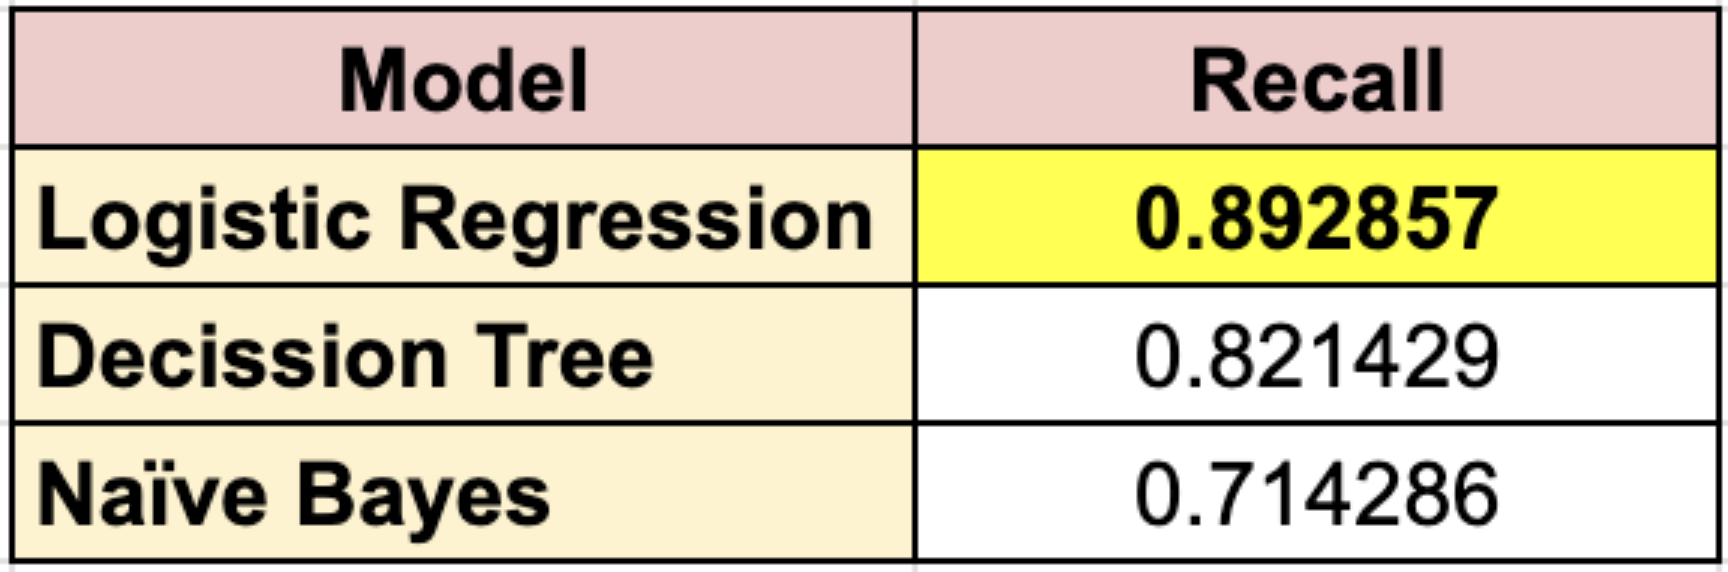

The highest Recall for the logistic regression model is 0.89. It can be concluded that the logistic regression model is the best model for this dataset.